## Download the mnist dataset

In [60]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Stroing the data in X, y variable

In [61]:
X, y=mnist["data"].values, mnist["target"]
# X.shape
# y.shape

## Importing matplotlib, and visualizing an image from the dataset

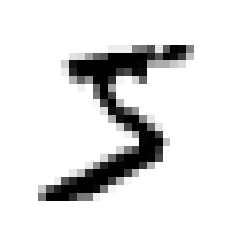

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=X[0]
some_digit_image=some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [63]:
y[0]

'5'

## Converting y value from str to int

In [64]:
import numpy as np
y=y.astype(np.uint8)

### The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [65]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

In [66]:
print(X_train, X_test)
print(y_train, y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: uint8 60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: uint8


## Let's just predict the number five, whether given number is true or false?

### Make the output value as if 5 then true else false, 

In [67]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)
print(y_train_5)
print(y_test_5)

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool
60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool


## Training the Model using Stochastic Gradient Descent (SGD) classifier

In [68]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

## check for the digit we viewed using matplotlib above

In [69]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measure

### Accuracy using cross_val_score()

In [70]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

##  classifier that just classifies every single image in the “not-5” class

In [71]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [72]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

That’s right, it has over 90% accuracy! This is simply because only about
10% of the images are 5s, so if you always guess that an image is not a 5,
you will be right about 90% of the time. Beats Nostradamus.
This demonstrates why accuracy is generally not the preferred performance
measure for classifiers, especially when you are dealing with skewed
datasets (i.e., when some classes are much more frequent than others).

----
## Confusion Matrix

In [73]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [74]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5, y_train_pred)

In [75]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

## Precision and Recall

In [76]:
from sklearn.metrics import precision_score, recall_score
print("Precision-> ", precision_score(y_train_5, y_train_pred))
print("Recall-> ", recall_score(y_train_5, y_train_pred))

Precision->  0.8370879772350012
Recall->  0.6511713705958311


When it claims an image represents a 5, it is correct only 83.7% of
the time. Moreover, it only detects 65.1% of the 5s.

## F1 Score

In [77]:
from sklearn.metrics import f1_score
print("F1 Score-> ", f1_score(y_train_5, y_train_pred))

F1 Score->  0.7325171197343846


F1 Score is the Harmonic Mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F score if both recall and precision are high.

## Precision/Recall Trade Off

In [78]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [79]:
threshold=0
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the previous code
returns the same result as the predict() method (i.e., True).

In [80]:
threshold=5000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 5,000.

## Use cross_val_predict() method to generate all decision function scores in the training set.

In [81]:
y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

This confirms that raising the threshold decreases recall. The image actually
represents a 5, and the classifier detects it when the threshold is 0, but it
misses it when the threshold is increased to 8,000.

In [82]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds=precision_recall_curve(y_train_5, y_scores)

In [83]:
print("Precisions-> ",precisions)
print("Recalls-> ",recalls)
print("Thresholds-> ", thresholds)

Precisions->  [0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ]
Recalls->  [1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
Thresholds->  [-106527.45300471 -105763.22240074 -105406.2965229  ...   38871.26391927
   42216.05562787   49441.43765905]


## Matplotlib to plot precision and recall as functions of the threshold value

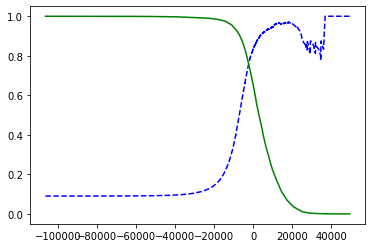

In [84]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### Another way to select a good precision/recall trade-off is to plot precision directly against recall

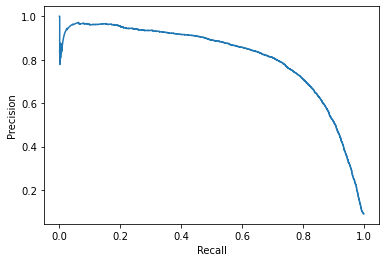

In [85]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

np.argmax() will give you the first index of the maximum value, which in
this case means the first True value

In [86]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

### To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can run this code

In [87]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

## Predictions of precision and recall

In [88]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [89]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## ROC Curve

In [90]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds=roc_curve(y_train_5, y_scores)
print(fpr, tpr, thresholds)

[0.         0.         0.         ... 0.99937705 0.99937705 1.        ] [0.00000000e+00 1.84467810e-04 9.22339052e-04 ... 9.99815532e-01
 1.00000000e+00 1.00000000e+00] [  49442.43765905   49441.43765905   36801.60697028 ... -105763.22240074
 -106527.45300471 -146348.56726174]


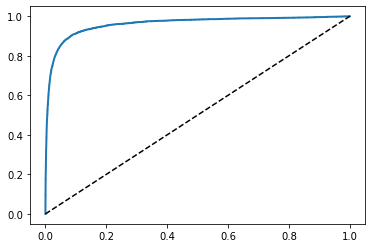

In [91]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    [...]
plot_roc_curve(fpr, tpr)
plt.show()


## ROC Area Under the Curve

In [94]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_train_pred)

0.8192920558800075

## Predict using Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_proba_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [98]:
y_scores_forest = y_proba_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

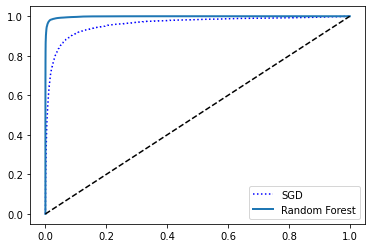

In [99]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [100]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145